In [1]:
import scipy
import matplotlib.pyplot as plt
import polars as pl


In [38]:
def load_from_mat(
    file_path: str, start_time: float = 0, end_time: float = float("inf")
) -> pl.DataFrame:
    mat = scipy.io.loadmat(file_path)
    ts = mat["ans"]

    df = pl.DataFrame(
        {
            "time": ts[0, :],
            "travel": ts[1, :],
            "travel_rate": ts[2, :],
            "pitch": ts[3, :],
            "pitch_rate": ts[4, :],
            "elevation": ts[5, :],
            "elevation_rate": ts[6, :],
            "joystick_x": ts[7, :],
            "joystick_y": ts[8, :],
        }
    )

    if len(ts) != len(df.columns):
        raise ValueError("Mismatch between data and columns")

    return df.filter((pl.col("time") >= start_time) & (pl.col("time") <= end_time))


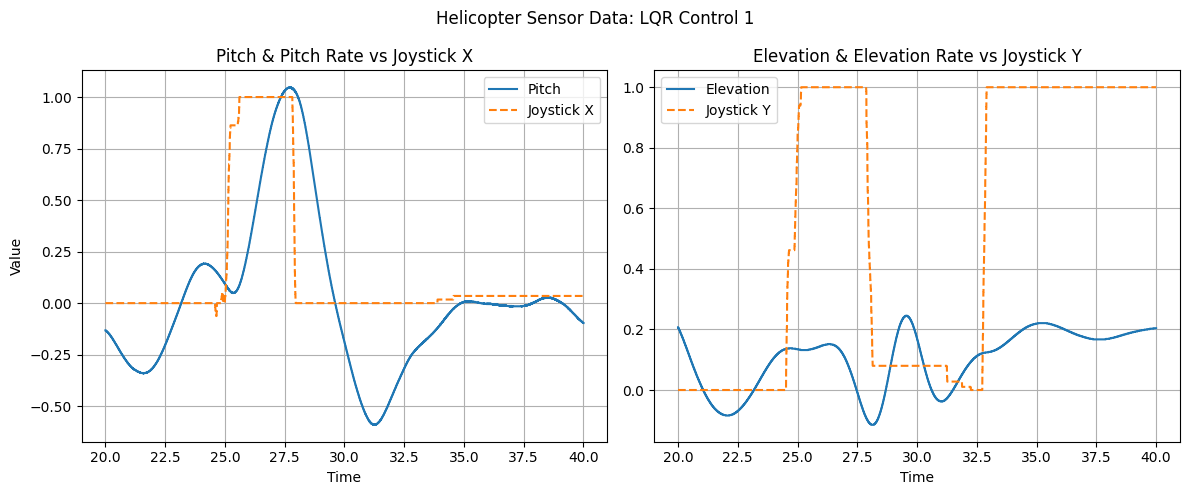

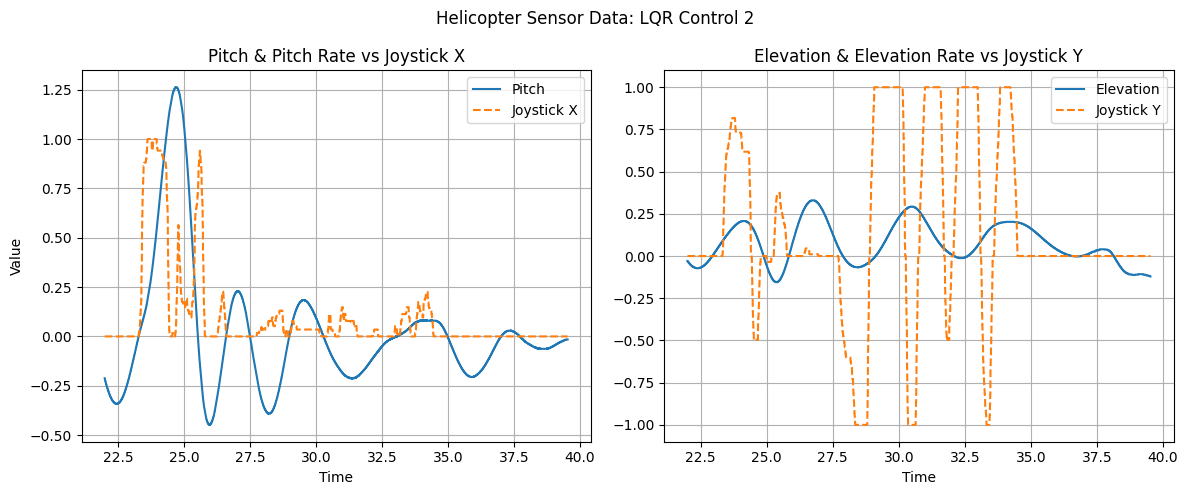

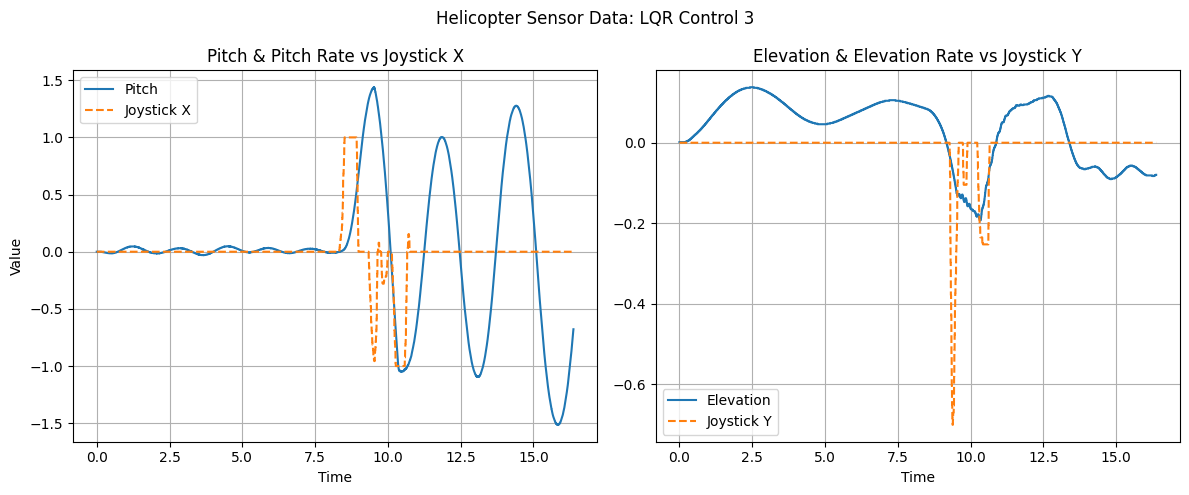

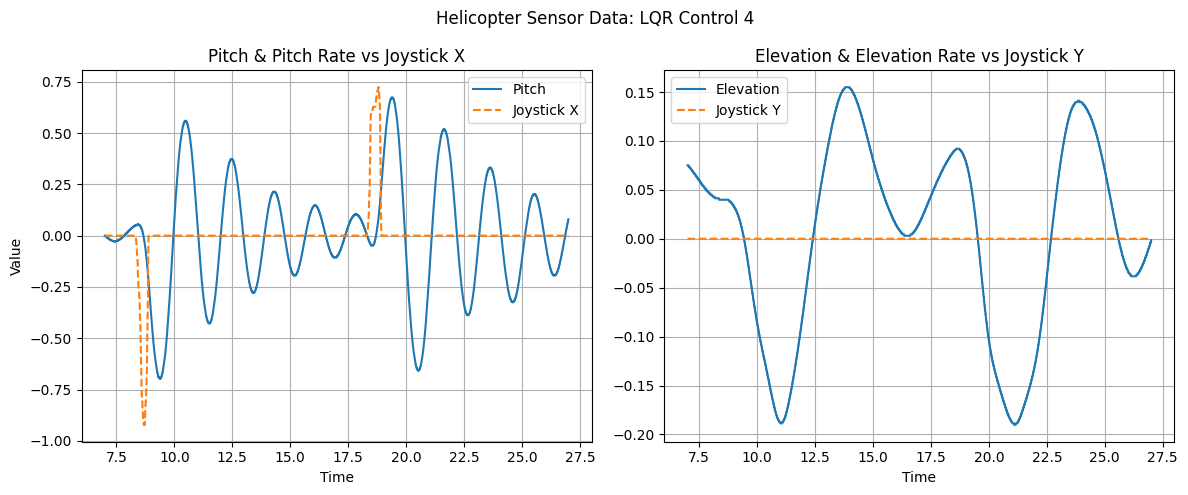

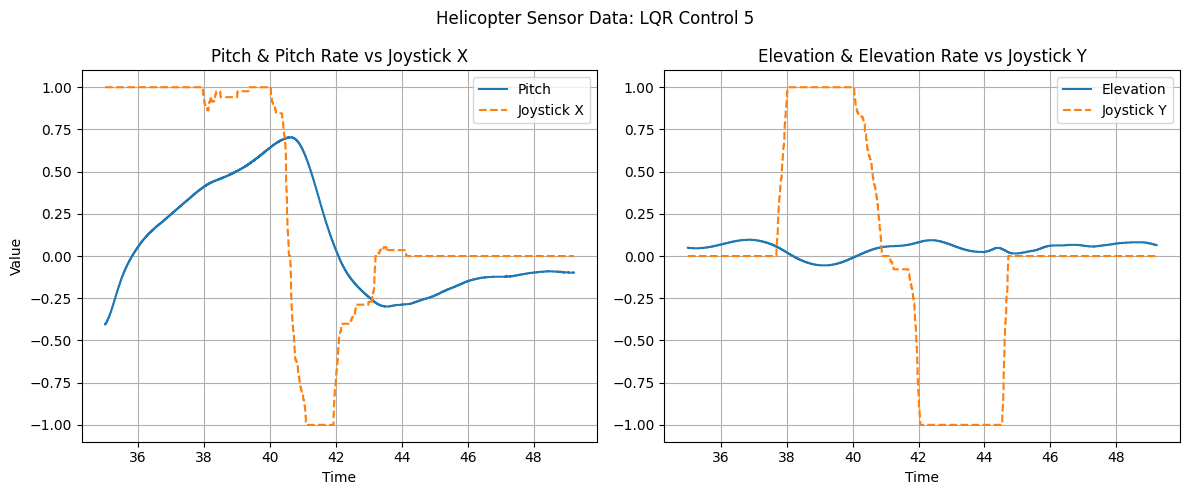

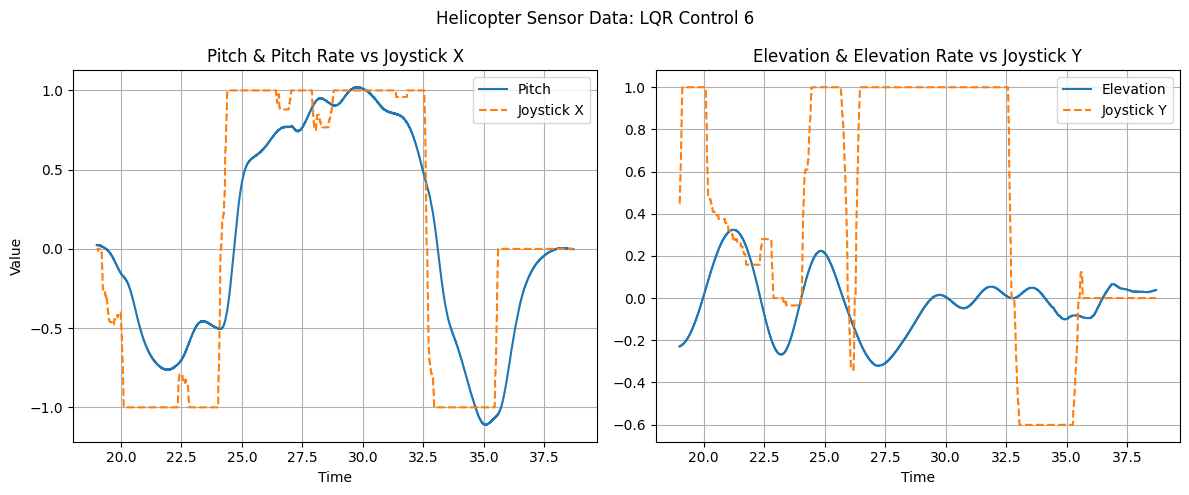

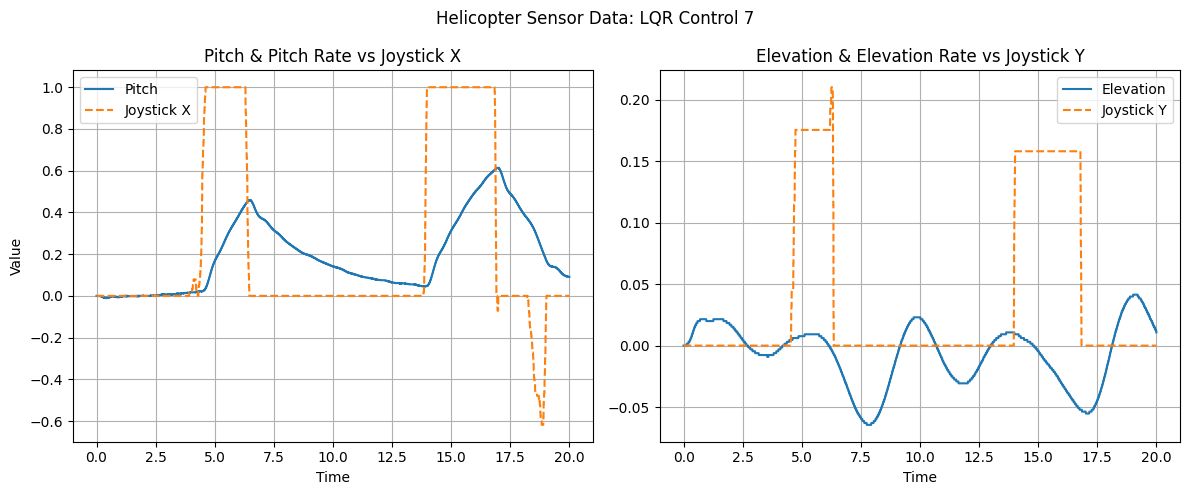

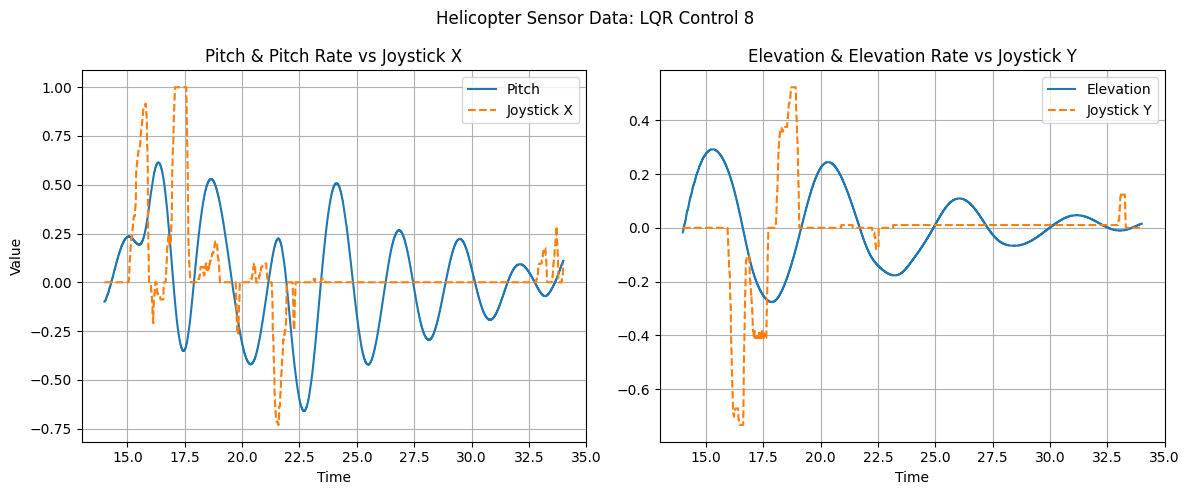

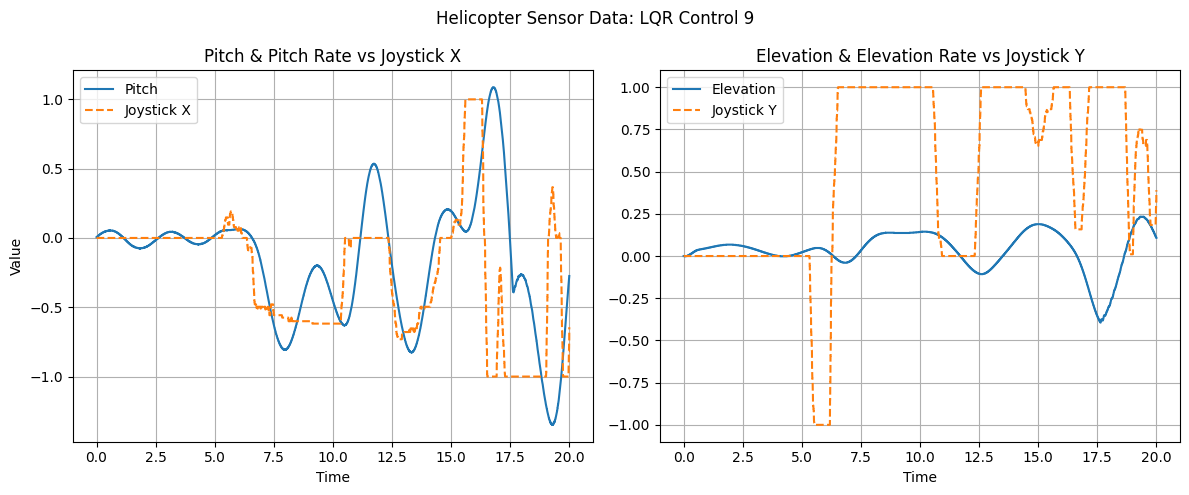

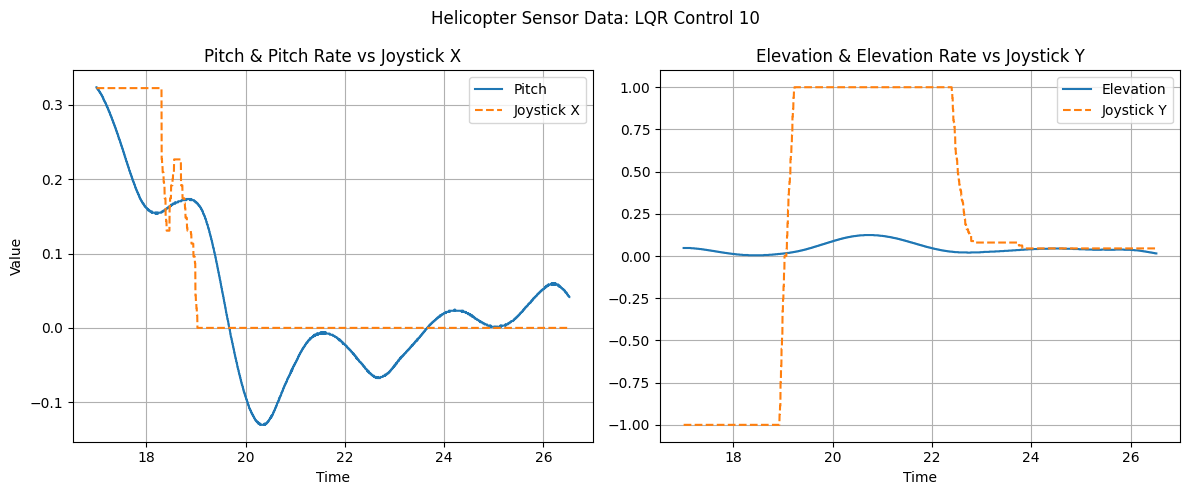

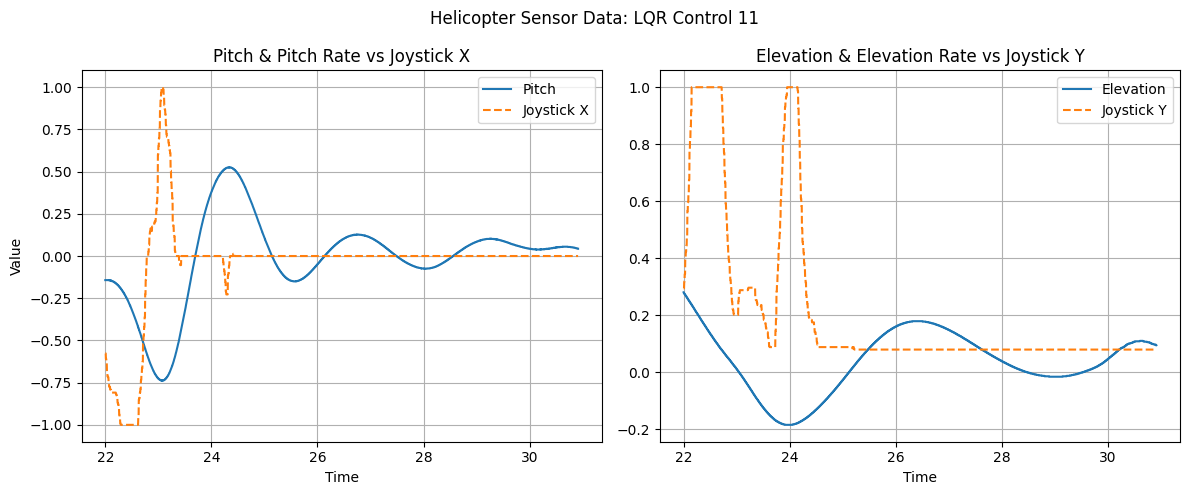

In [79]:
def plot(nr: int, start_time: float):
    data = load_from_mat(f"data/2/data_lqr_1.{nr}.mat", start_time, start_time + 20)

    fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharex=True)

    # Left: Pitch & Pitch_rate vs Joystick X
    axes[0].plot(data["time"], data["pitch"], label="Pitch")
    # axes[0].plot(data["time"], data["pitch_rate"], label="Pitch Rate")
    axes[0].plot(data["time"], data["joystick_x"], label="Joystick X", linestyle="--")
    axes[0].set_title("Pitch & Pitch Rate vs Joystick X")
    axes[0].set_xlabel("Time")
    axes[0].set_ylabel("Value")
    axes[0].legend()
    axes[0].grid(True)

    # Right: Elevation & Elevation_rate vs Joystick Y
    axes[1].plot(data["time"], data["elevation"], label="Elevation")
    # axes[1].plot(data["time"], data["elevation_rate"], label="Elevation Rate")
    axes[1].plot(data["time"], data["joystick_y"], label="Joystick Y", linestyle="--")
    axes[1].set_title("Elevation & Elevation Rate vs Joystick Y")
    axes[1].set_xlabel("Time")
    axes[1].legend()
    axes[1].grid(True)

    plt.suptitle("Helicopter Sensor Data: LQR Control " + str(nr))
    plt.tight_layout()
    plt.show()


plot(1, 20)
plot(2, 22)
plot(3, 0)
plot(4, 7)
plot(5, 35)
plot(6, 19)
plot(7, 0)
plot(8, 14)
plot(9, 0)
plot(10, 17)
plot(11, 22)

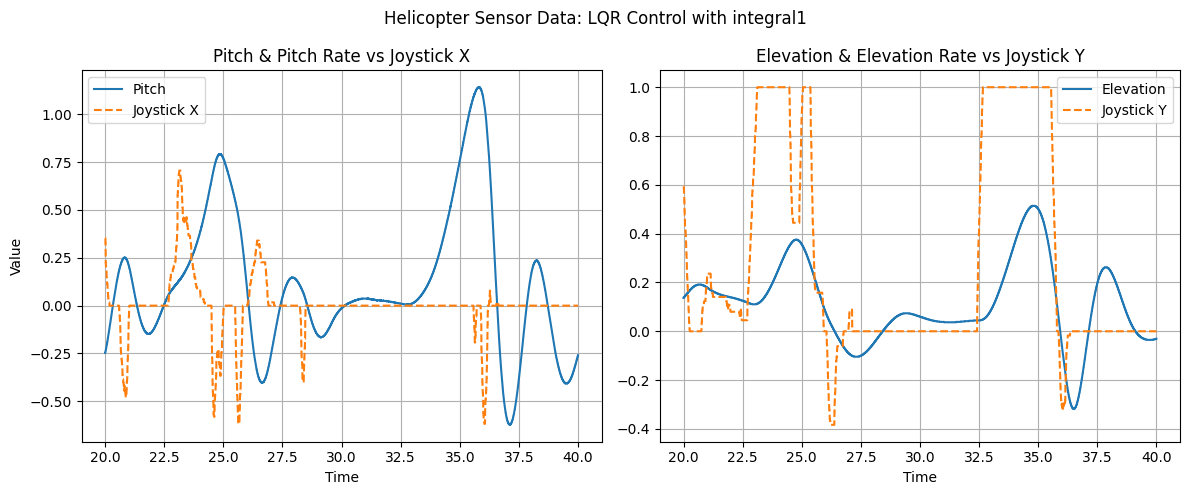

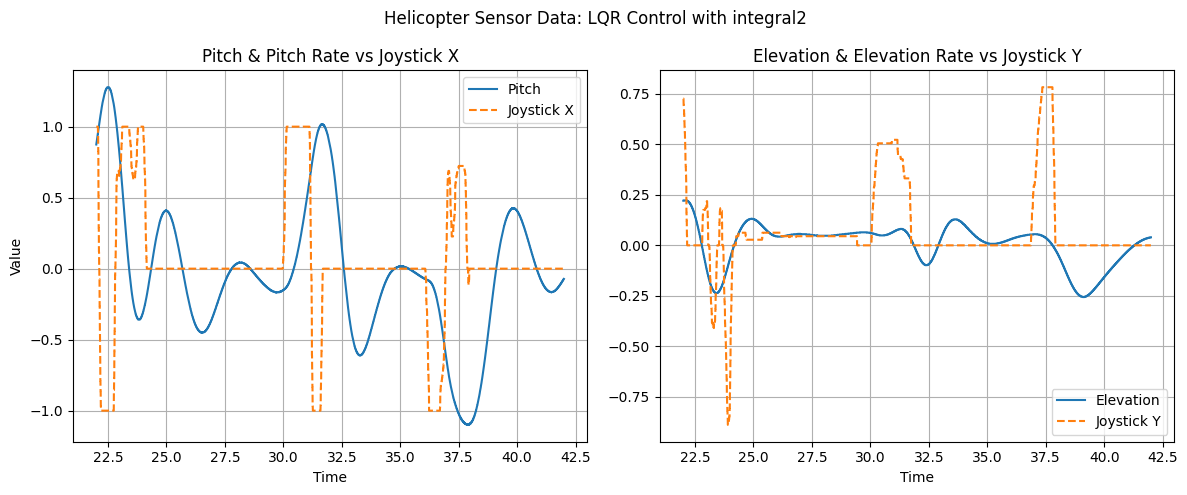

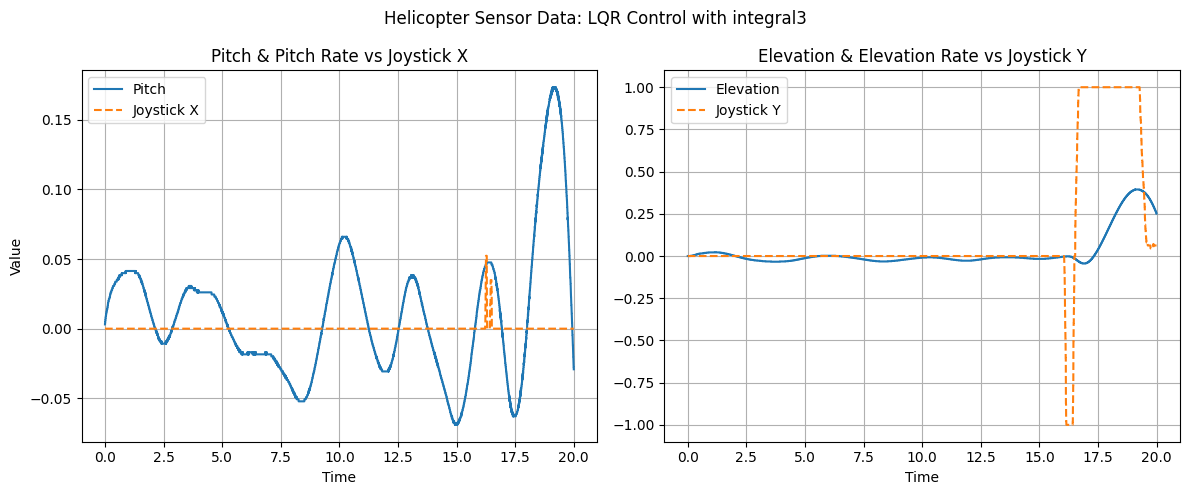

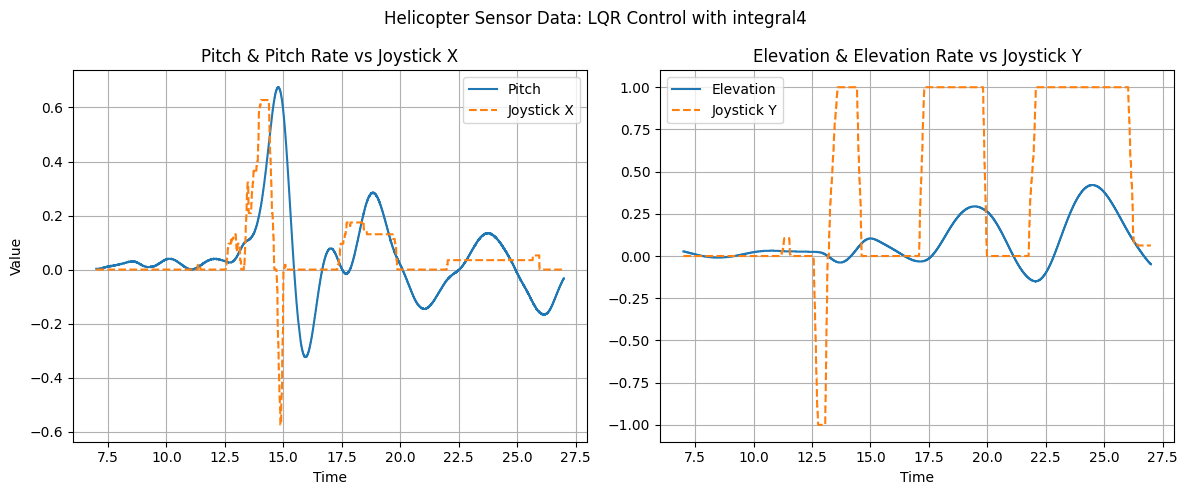

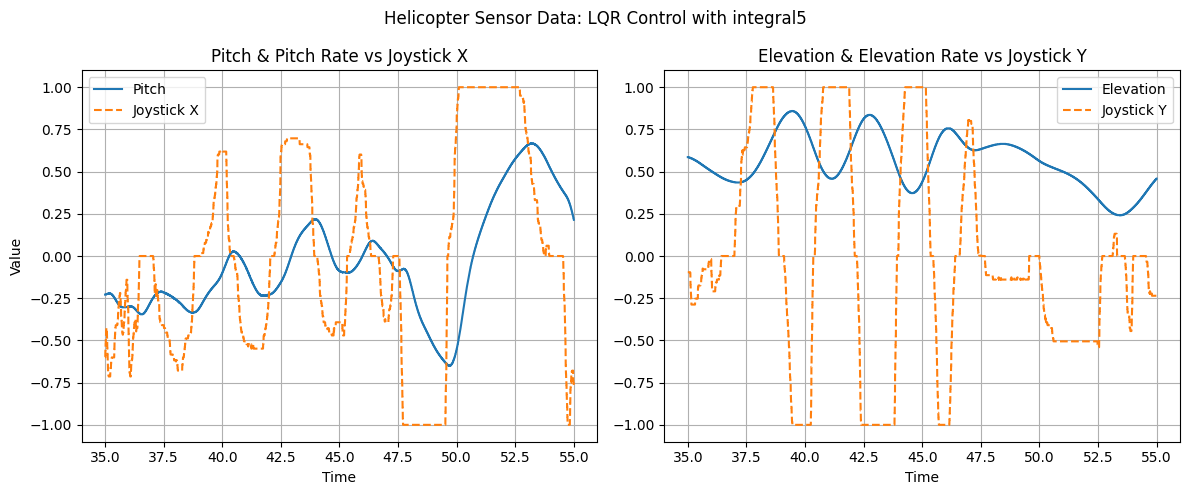

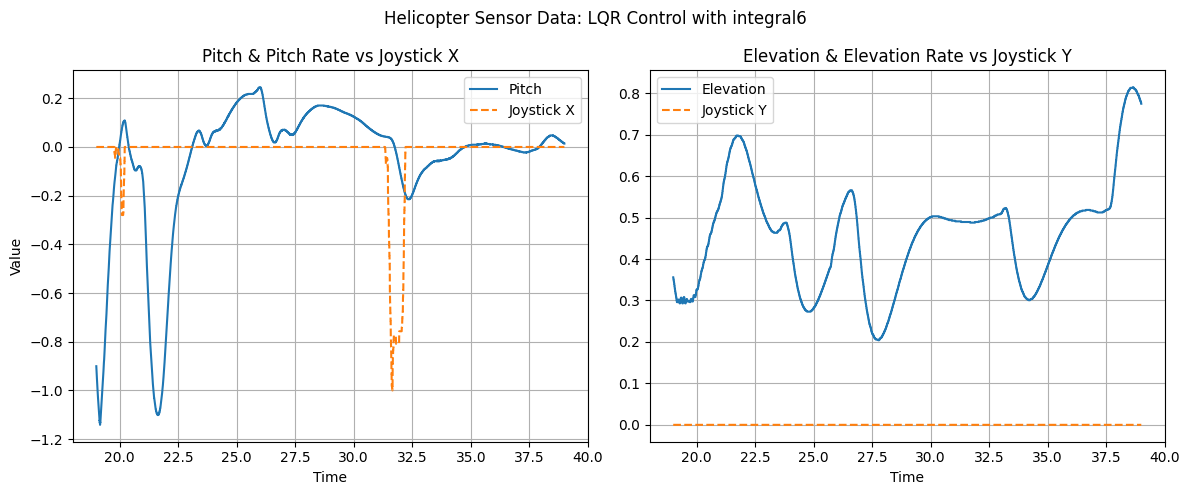

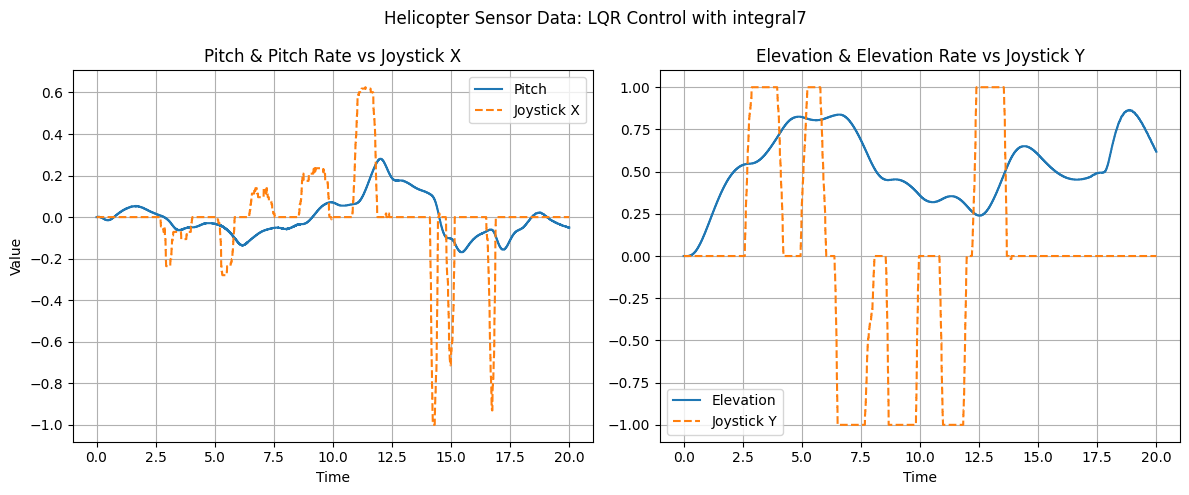

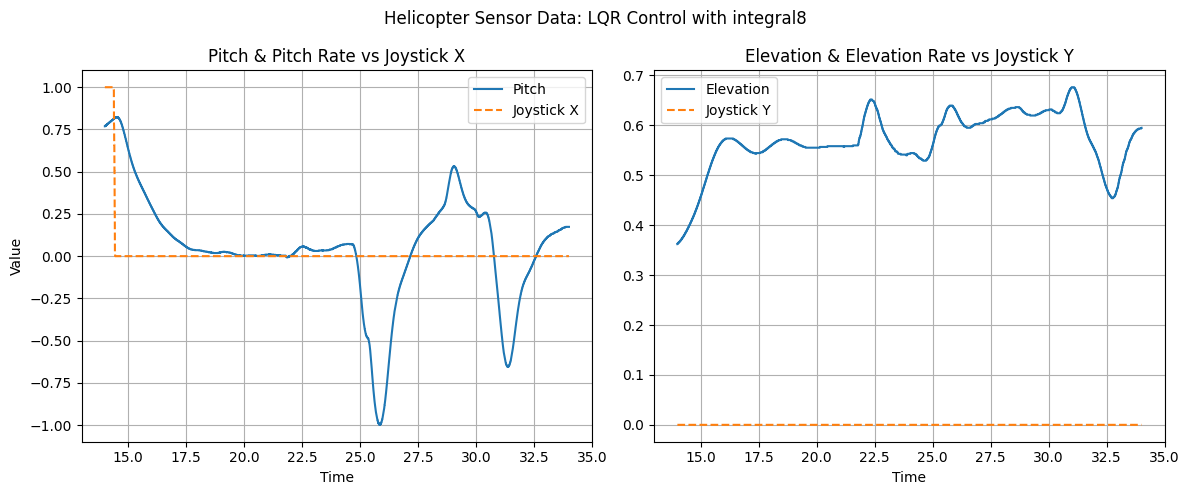

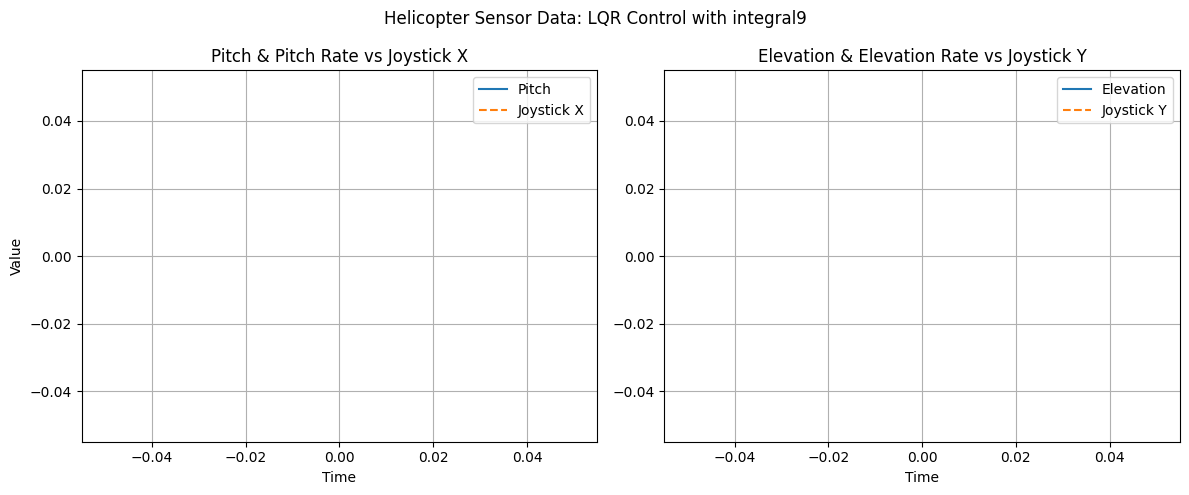

In [80]:
def plot(nr: int, start_time: float):
    data = load_from_mat(f"data/2/data_lqr_2.{nr}.mat", start_time, start_time + 20)

    fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharex=True)

    # Left: Pitch & Pitch_rate vs Joystick X
    axes[0].plot(data["time"], data["pitch"], label="Pitch")
    # axes[0].plot(data["time"], data["pitch_rate"], label="Pitch Rate")
    axes[0].plot(data["time"], data["joystick_x"], label="Joystick X", linestyle="--")
    axes[0].set_title("Pitch & Pitch Rate vs Joystick X")
    axes[0].set_xlabel("Time")
    axes[0].set_ylabel("Value")
    axes[0].legend()
    axes[0].grid(True)

    # Right: Elevation & Elevation_rate vs Joystick Y
    axes[1].plot(data["time"], data["elevation"], label="Elevation")
    # axes[1].plot(data["time"], data["elevation_rate"], label="Elevation Rate")
    axes[1].plot(data["time"], data["joystick_y"], label="Joystick Y", linestyle="--")
    axes[1].set_title("Elevation & Elevation Rate vs Joystick Y")
    axes[1].set_xlabel("Time")
    axes[1].legend()
    axes[1].grid(True)

    plt.suptitle("Helicopter Sensor Data: LQR Control with integral" + str(nr))
    plt.tight_layout()
    plt.show()


plot(1, 20)
plot(2, 22)
plot(3, 0)
plot(4, 7)
plot(5, 35)
plot(6, 19)
plot(7, 0)
plot(8, 14)
plot(9, 0)